Initiate the module we need for plots and statistics

In [2]:
import pandas as pd
import seaborn as sns
import os

import numpy as np


Let's merge all the measurment to one CSV file for each LTE network

In [ ]:
# Define the main folders containing the CSV files
main_folders = ['Private Light', 'Private Full']

# Define the location folders
location_folders = ['loc1', 'loc2']

# Initialize dictionaries to hold DataFrames for each plot type
all_files = {'t-g-plot': [], 'delay-plot': []}

# Function to extract loop from filename
def extract_loop_from_filename(filename):
    parts = filename.split('-')
    loop = next((int(part[4:]) for part in parts if part.startswith('loop')), None)
    if loop is None:
        raise ValueError(f"Cannot extract loop number from filename: {filename}")
    return loop

# Iterate over each main folder (Private Light and Private Full)
for main_folder in main_folders:
    # Determine traffic type based on the main folder
    traffic = 'Full' if 'Full' in main_folder else 'Light'
    
    # Iterate over each location folder (loc1 and loc2)
    for location_folder in location_folders:
        # Iterate over each plot type (t-g-plot and delay-plot)
        for plot_type in all_files.keys():
            folder_path = os.path.join(main_folder, location_folder, plot_type)
            
            # Get the list of all CSV files in the plot type folder
            csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    
            # Iterate over each CSV file
            for csv_file in csv_files:
                # Load the CSV file
                file_path = os.path.join(folder_path, csv_file)
                df = pd.read_csv(file_path)
                
                # Extract loop from filename
                loop = extract_loop_from_filename(csv_file)
                network = 'private'
                location = location_folder
                
                # Add new columns
                df['loop'] = loop
                df['network'] = network
                df['location'] = location
                df['traffic'] = traffic
                
                # Reorder columns to place new columns before the first original column
                new_columns = ['loop', 'network', 'location', 'traffic']
                cols = new_columns + [col for col in df.columns if col not in new_columns]
                df = df[cols]
                
                # Append the DataFrame to the list for the corresponding plot type
                all_files[plot_type].append(df)

# Merge all DataFrames for each plot type, sort, and save to separate CSV files
for plot_type, dataframes in all_files.items():
    if dataframes:  # Check if there are dataframes to concatenate
        merged_df = pd.concat(dataframes, ignore_index=True)
        # Sort by location, traffic, and loop in the desired order
        merged_df = merged_df.sort_values(by=['loop', 'traffic', 'location']).reset_index(drop=True)
        output_filename = f'merged-{plot_type}.csv'
        merged_df.to_csv(output_filename, index=False)
    else:
        print(f"No dataframes found for plot type: {plot_type}")


Then, let's plot the throughput firstly from two traiffc pattern

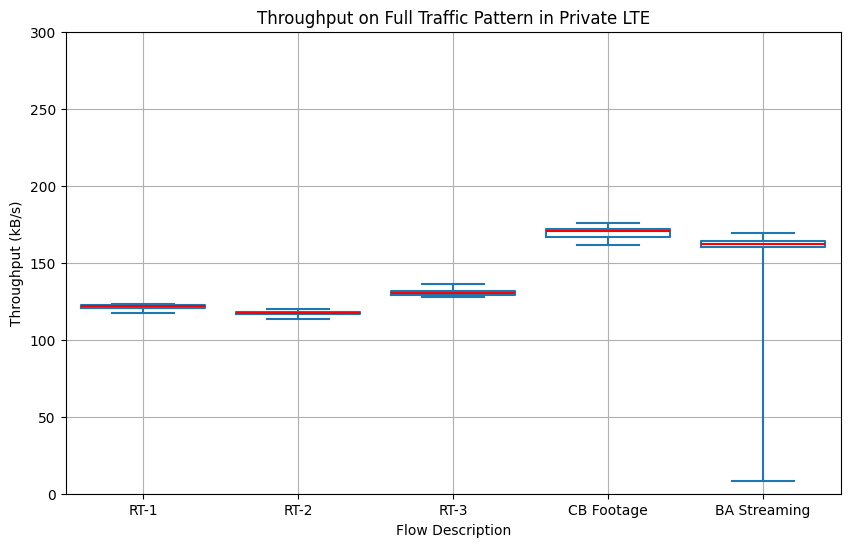

In [10]:
import matplotlib.pyplot as plt

# Load the CSV file
merged_df = pd.read_csv('private-t-g-plot.csv')

# Define flow descriptions
flow_descriptions = {
    1: 'RT-1',
    2: 'RT-2',
    3: 'RT-3',
    7: 'CB Footage',
    8: 'BA Streaming'
}

# Filter the data for flow IDs 1, 2, 3, 7, and 8
filtered_data = merged_df[merged_df['FlowID'].isin([1, 2, 3, 7, 8])].copy()

# Convert Throughput to kilobytes (KB/s)
filtered_data['Throughput'] = filtered_data['Throughput'] / 1000


# Create two figures, one for Full traffic and one for Light traffic
full_traffic_data = filtered_data[filtered_data['traffic'] == 'Full'].copy()
light_traffic_data = filtered_data[filtered_data['traffic'] == 'Light'].copy()

# Map Flow IDs to descriptions
full_traffic_data.loc[:, 'FlowDescription'] = full_traffic_data['FlowID'].map(flow_descriptions)
light_traffic_data.loc[:, 'FlowDescription'] = light_traffic_data['FlowID'].map(flow_descriptions)

# Create the plot for full traffic data
plt.figure(figsize=(10, 6))

plot =sns.boxplot(data=full_traffic_data, x='FlowDescription', y='Throughput', whis=(0, 100),medianprops={"color": "r"}, fill=False)
#plt = sns.stripplot(data=full_traffic_data, x='FlowID', y='Throughput',jitter=False)

plot.set_xlabel('Flow Description')
plot.set_ylabel('Throughput (kB/s)')
plot.set_title('Throughput on Full Traffic Pattern in Private LTE')
# Optional: Set y-axis limit
plot.set_ylim(0, 300)
plt.grid(True) 

plot.tick_params(labelrotation=0)



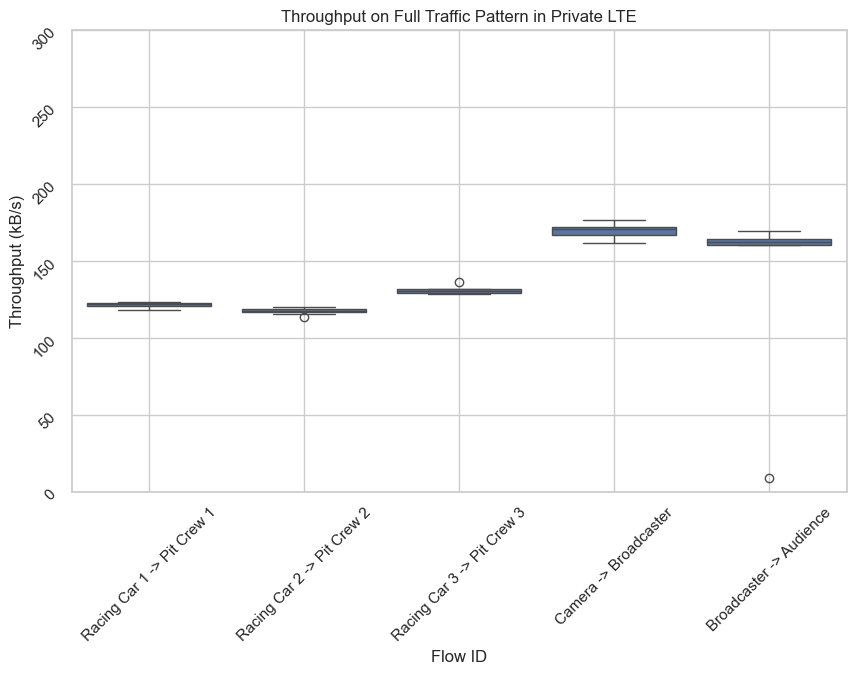

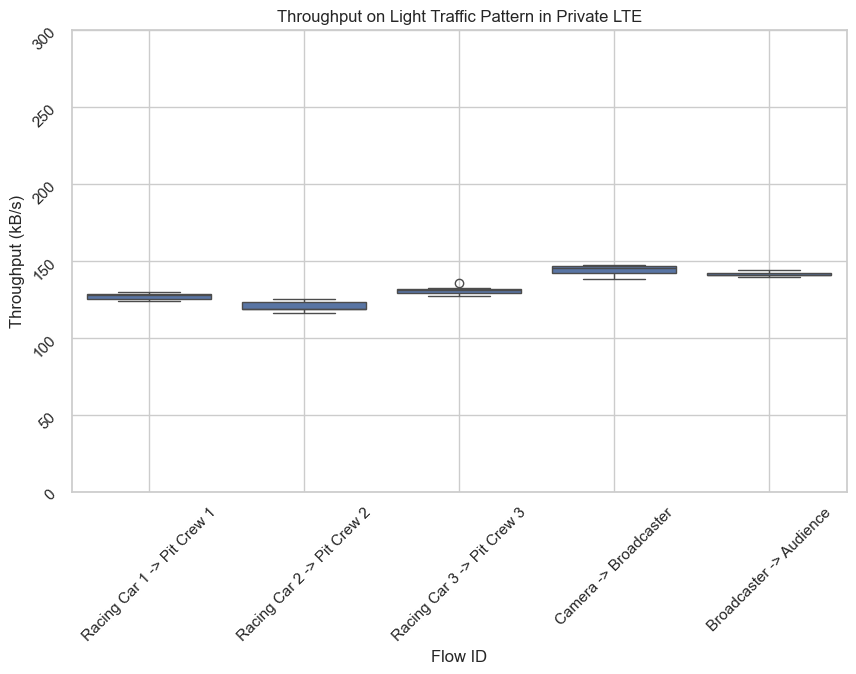

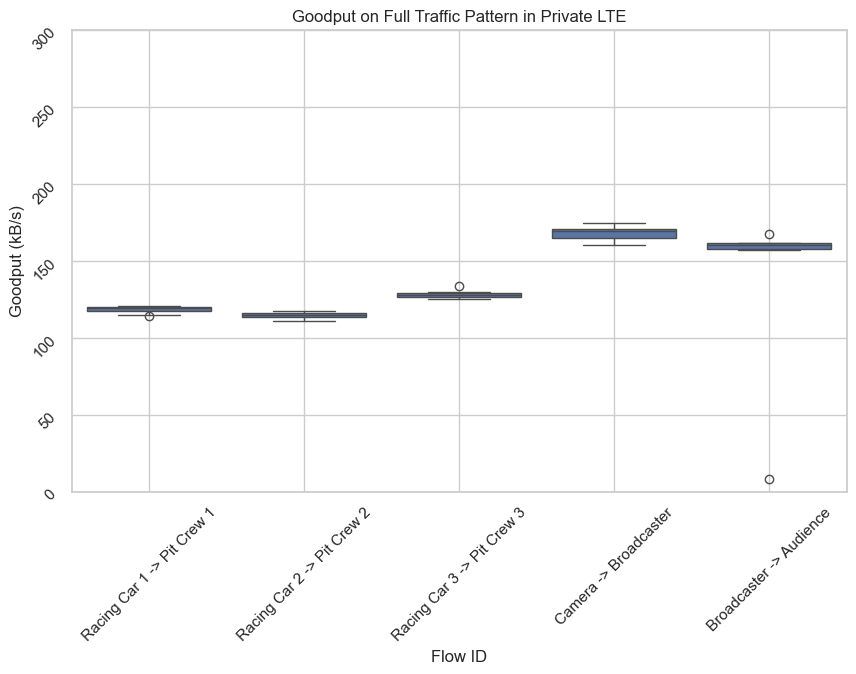

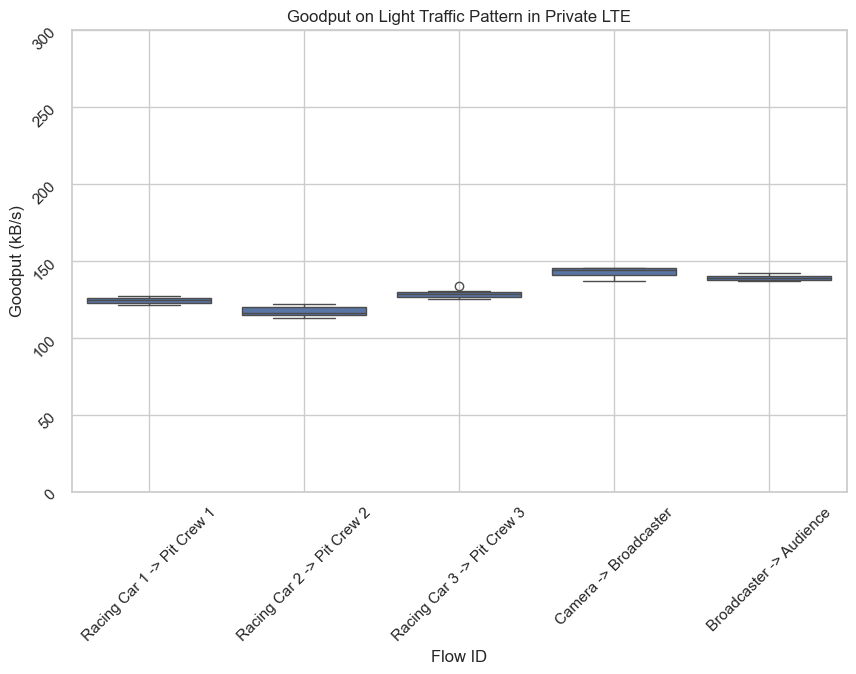

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the CSV file
merged_df = pd.read_csv('private-t-g-plot.csv')

# Define flow descriptions
flow_descriptions = {
    1: 'Racing Car 1 -> Pit Crew 1',
    2: 'Racing Car 2 -> Pit Crew 2',
    3: 'Racing Car 3 -> Pit Crew 3',
    7: 'Camera -> Broadcaster',
    8: 'Broadcaster -> Audience'
}

# Filter the data for flow IDs 1, 2, 3, 7, and 8
filtered_data = merged_df[merged_df['FlowID'].isin([1, 2, 3, 7, 8])].copy()

# Convert Throughput and Goodput to kilobytes (KB/s)
filtered_data['Throughput'] = filtered_data['Throughput'] / 1000
filtered_data['Goodput'] = filtered_data['Goodput'] / 1000

# Create two figures, one for Full traffic and one for Light traffic
full_traffic_data = filtered_data[filtered_data['traffic'] == 'Full'].copy()
light_traffic_data = filtered_data[filtered_data['traffic'] == 'Light'].copy()

# Map Flow IDs to descriptions
full_traffic_data.loc[:, 'FlowDescription'] = full_traffic_data['FlowID'].map(flow_descriptions)
light_traffic_data.loc[:, 'FlowDescription'] = light_traffic_data['FlowID'].map(flow_descriptions)

# Create the plot for full traffic throughput data
plt.figure(figsize=(10, 6))
plot = sns.boxplot(data=full_traffic_data, x='FlowDescription', y='Throughput')
plot.set_xlabel('Flow ID')
plot.set_ylabel('Throughput (kB/s)')
plot.set_title('Throughput on Full Traffic Pattern in Private LTE')
plot.set_ylim(0, 300)
plt.grid(True)
plot.tick_params(labelrotation=45)
plt.show()

# Create the plot for light traffic throughput data
plt.figure(figsize=(10, 6))
plot_light = sns.boxplot(data=light_traffic_data, x='FlowDescription', y='Throughput')
plot_light.set_xlabel('Flow ID')
plot_light.set_ylabel('Throughput (kB/s)')
plot_light.set_title('Throughput on Light Traffic Pattern in Private LTE')
plot_light.set_ylim(0, 300)
plt.grid(True)
plot_light.tick_params(labelrotation=45)
plt.show()

# Create the plot for full traffic goodput data
plt.figure(figsize=(10, 6))
plot_goodput = sns.boxplot(data=full_traffic_data, x='FlowDescription', y='Goodput')
plot_goodput.set_xlabel('Flow ID')
plot_goodput.set_ylabel('Goodput (kB/s)')
plot_goodput.set_title('Goodput on Full Traffic Pattern in Private LTE')
plot_goodput.set_ylim(0, 300)
plt.grid(True)
plot_goodput.tick_params(labelrotation=45)
plt.show()

# Create the plot for light traffic goodput data
plt.figure(figsize=(10, 6))
plot_light_goodput = sns.boxplot(data=light_traffic_data, x='FlowDescription', y='Goodput')
plot_light_goodput.set_xlabel('Flow ID')
plot_light_goodput.set_ylabel('Goodput (kB/s)')
plot_light_goodput.set_title('Goodput on Light Traffic Pattern in Private LTE')
plot_light_goodput.set_ylim(0, 300)
plt.grid(True)
plot_light_goodput.tick_params(labelrotation=45)
plt.show()


After that, we can plot the light traffic pattern to check the differences

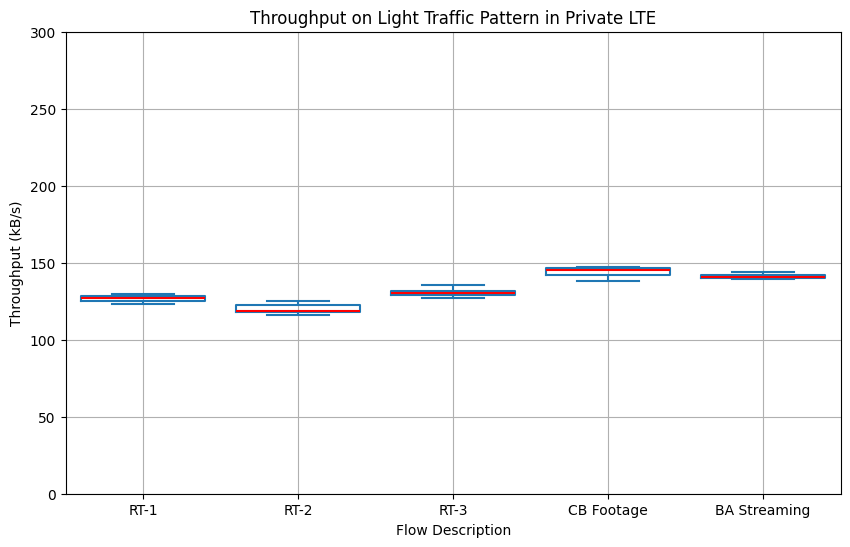

In [11]:
import matplotlib.pyplot as plt
# Create the plot for full traffic data
plt.figure(figsize=(10, 6))
plot =sns.boxplot(data=light_traffic_data, x='FlowDescription', y='Throughput', whis=(0, 100),medianprops={"color": "r"}, fill=False)
# Optional: Set y-axis limit
plt.grid(True) 

plot.set_xlabel('Flow Description')
plot.set_ylabel('Throughput (kB/s)')
plot.set_title('Throughput on Light Traffic Pattern in Private LTE')
# Optional: Set y-axis limit
plot.set_ylim(0, 300)

plot.tick_params(labelrotation=0)


In [4]:
import pandas as pd

# Load the data from the CSV file
data = pd.read_csv('private-t-g-plot.csv')

# Filter the data based on FlowID
plot_data = data[data["FlowID"].isin([1, 2, 3, 7, 8])]

# Group by 'FlowID' and aggregate 'Throughput' with mean, min, max, and median
plot_data = plot_data.groupby('FlowID').agg({
    'Throughput': ['mean', 'min', 'max', 'median']
})

# Flatten the multi-level column index and rename columns
plot_data.columns = ['_'.join(col).strip() for col in plot_data.columns.values]

# Reset index to ensure 'FlowID' is a column in the DataFrame
plot_data.reset_index(inplace=True)

# Display the resulting DataFrame
print(plot_data)


   FlowID  Throughput_mean  Throughput_min  Throughput_max  Throughput_median
0       1    123888.589295   117621.878604   129817.481056      123219.155295
1       2    118652.504254   113245.535378   125058.973413      118276.554590
2       3    130640.367588   127074.884218   136200.839828      130279.217352
3       7    156795.615407   138022.973493   176064.226706      154295.421979
4       8    142480.294575     8559.821822   169046.010574      143543.595437


(0.0, 200.0)

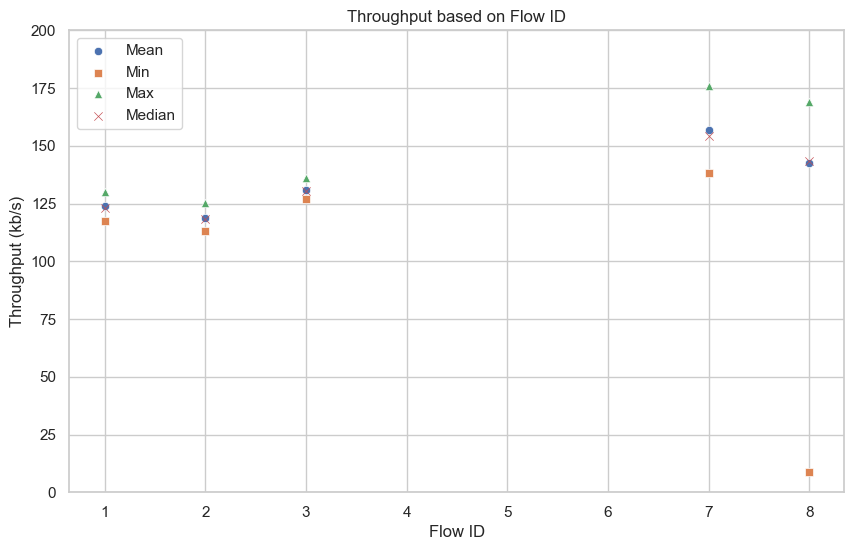

In [5]:

import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('private-t-g-plot.csv')

# Filter the data based on FlowID
plot_data = data[data["FlowID"].isin([1, 2, 3, 7, 8])]

# Group by 'FlowID' and aggregate 'Throughput' with mean, min, max, and median
plot_data = plot_data.groupby('FlowID').agg({
    'Throughput': ['mean', 'min', 'max', 'median']
})

# Flatten the multi-level column index and rename columns
plot_data.columns = ['_'.join(col).strip() for col in plot_data.columns.values]

# Reset index to ensure 'FlowID' is a column in the DataFrame
plot_data.reset_index(inplace=True)

# Convert throughput to kilobytes per second
plot_data['Throughput_mean'] /= 1000
plot_data['Throughput_min'] /= 1000
plot_data['Throughput_max'] /= 1000
plot_data['Throughput_median'] /= 1000

# Plotting with seaborn
sns.set(style="whitegrid")  # Set the style
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot mean, min, max, and median separately
plt = sns.scatterplot(x='FlowID', y='Throughput_mean', data=plot_data, label='Mean', marker='o')
plt = sns.scatterplot(x='FlowID', y='Throughput_min', data=plot_data, label='Min', marker='s')
plt = sns.scatterplot(x='FlowID', y='Throughput_max', data=plot_data, label='Max', marker='^')
plt = sns.scatterplot(x='FlowID', y='Throughput_median', data=plot_data, label='Median', marker='x')

# Set labels and title
plt.set_xlabel('Flow ID')
plt.set_ylabel('Throughput (kb/s)')
plt.set_title('Throughput based on Flow ID')
plt.set_ylim(0, 200)





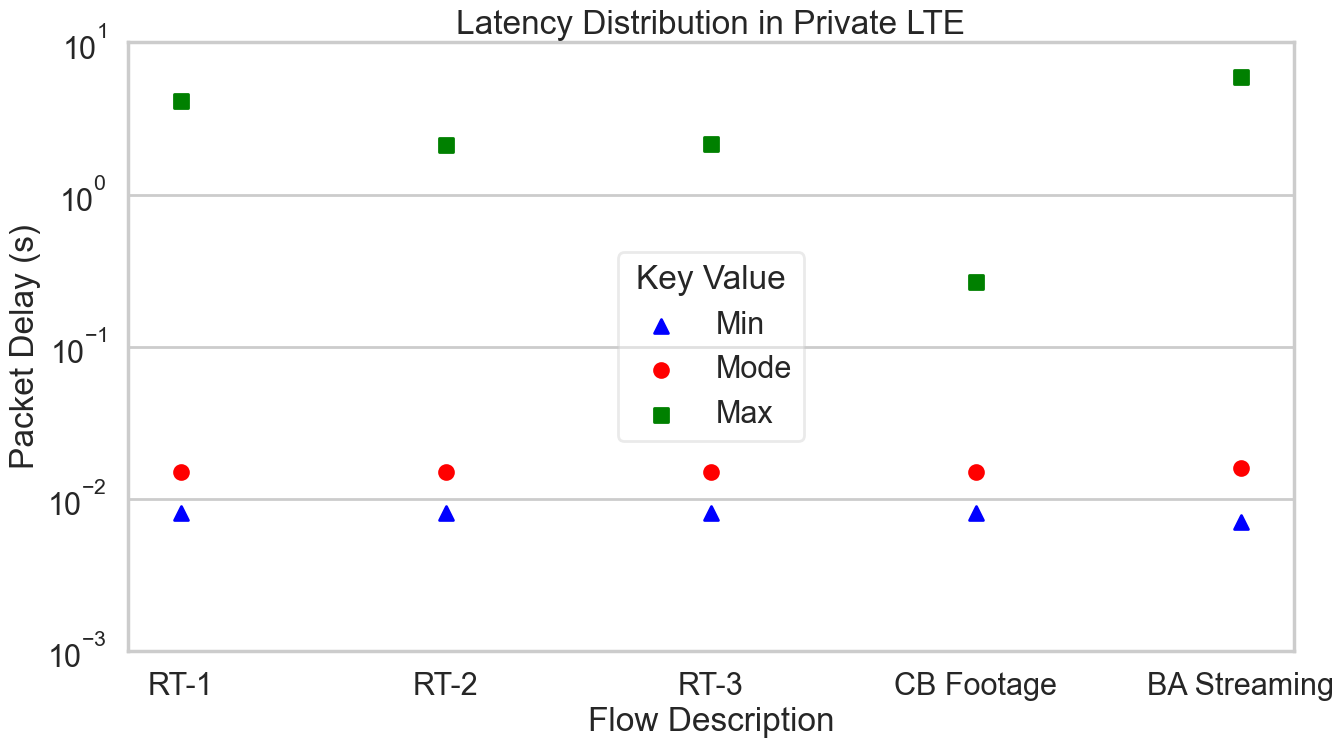

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the merged data
merged_df = pd.read_csv('private-delay-plot.csv')

# Define flow descriptions
flow_descriptions = {
    1: 'RT-1',
    2: 'RT-2',
    3: 'RT-3',
    7: 'CB Footage',
    8: 'BA Streaming'
}

# Filter the data based on FlowID
filtered_data = merged_df[merged_df['FlowID'].isin(flow_descriptions.keys())].copy()

# Map FlowID to Flow Description
filtered_data['Flow Description'] = filtered_data['FlowID'].map(flow_descriptions)

# Calculate min, max, and mode for each flow
stats_data = []
for flow_id, flow_desc in flow_descriptions.items():
    flow_data = filtered_data[filtered_data['FlowID'] == flow_id]
    
    min_delay = flow_data['Start'].min()
    max_delay = flow_data['Start'].max()
    
    # Calculate mode based on the highest count
    mode_delay = flow_data.loc[flow_data['Count'].idxmax(), 'Start']

    stats_data.append({
        'Flow Description': flow_desc,
        'Min': min_delay,
        'Max': max_delay,
        'Mode': mode_delay
    })

# Convert stats data to DataFrame
stats_df = pd.DataFrame(stats_data)

# Create the plot
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")
sns.set_context('poster')


# Plot min, max, and mode
for idx, row in stats_df.iterrows():
    flow_desc = row['Flow Description']
    min_delay = row['Min']
    max_delay = row['Max']
    mode_delay = row['Mode']
    
    plt.scatter([flow_desc], [min_delay], color='blue', marker='^', s=100, label='Min' if idx == 0 else "")
    plt.scatter([flow_desc], [mode_delay], color='red', marker='o', s=100, label='Mode' if idx == 0 else "")
    plt.scatter([flow_desc], [max_delay], color='green', marker='s', s=100, label='Max' if idx == 0 else "")

# Customize plot
plt.xlabel('Flow Description')
plt.ylabel('Packet Delay (s)')
plt.ylim(1/1000,10)  # Adjust the y-axis limit as needed
plt.yscale("log")
plt.title('Latency Distribution in Private LTE')
plt.xticks(rotation=0)
plt.grid(axis='x')
# Modify the legend to be transparent
plt.legend(title='Key Value', loc='center', framealpha=0.4)

# Show plot
plt.tight_layout()
#plt.show()
plt.savefig('delay-private.png',bbox_inches='tight')

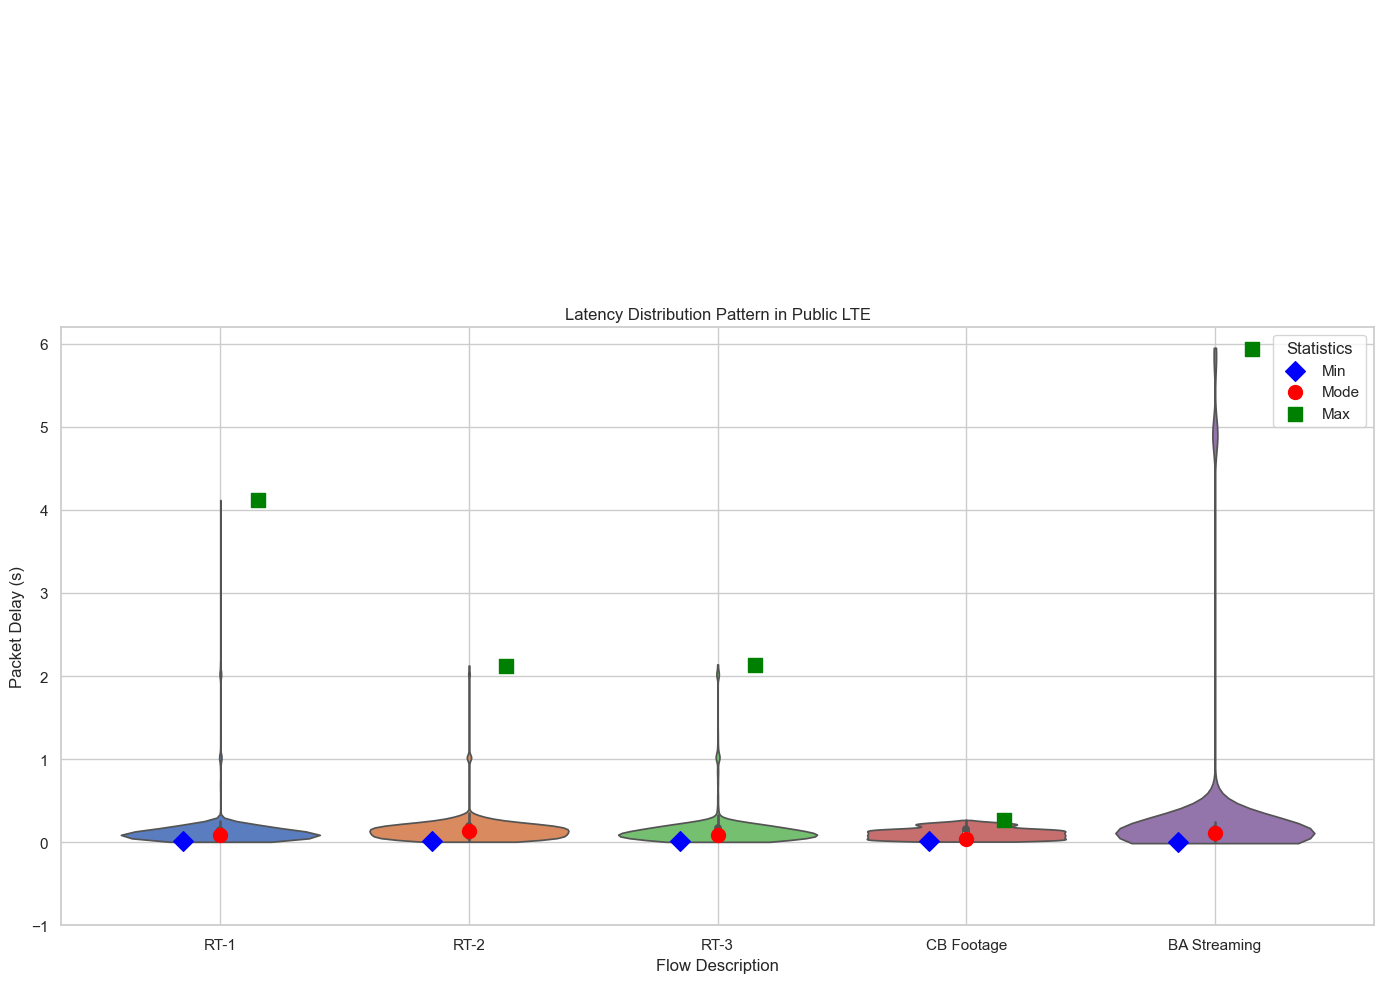

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

# Load the merged data
merged_df = pd.read_csv('private-delay-plot.csv')

# Define flow descriptions
flow_descriptions = {
    1: 'RT-1',
    2: 'RT-2',
    3: 'RT-3',
    7: 'CB Footage',
    8: 'BA Streaming'
}

# Filter the data based on FlowID
filtered_data = merged_df[merged_df['FlowID'].isin(flow_descriptions.keys())].copy()

# Map FlowID to Flow Description
filtered_data['Flow Description'] = filtered_data['FlowID'].map(flow_descriptions)

# Calculate min, max, and mode for each flow
stats_data = []
for flow_id, flow_desc in flow_descriptions.items():
    flow_data = filtered_data[filtered_data['FlowID'] == flow_id]
    min_delay = flow_data['Start'].min()
    max_delay = flow_data['Start'].max()

    # Calculate mode using KDE
    kde = stats.gaussian_kde(flow_data['Start'])
    x = np.linspace(min_delay, max_delay, 1000)
    kde_values = kde(x)
    mode_indices = np.argwhere(kde_values == np.amax(kde_values)).flatten()
    if len(mode_indices) > 1:
        mode_delay = (x[mode_indices[0]], x[mode_indices[-1]])
    else:
        mode_delay = x[mode_indices[0]]

    stats_data.append({'Flow Description': flow_desc, 'Min': min_delay, 'Max': max_delay, 'Mode': mode_delay})

# Convert stats data to DataFrame
stats_df = pd.DataFrame(stats_data)

# Create a grid of subplots
plt.figure(figsize=(14, 10))

# Add the subfigure in the middle top
plt.subplot(3, 1, (2, 3))  # 3 rows, 1 column, spanning rows 2 and 3
sns.set(style="whitegrid")
palette = sns.color_palette("muted", len(flow_descriptions))
swarm_plot = sns.violinplot(x='Flow Description', y='Start', hue='Flow Description', data=filtered_data, palette=palette, cut=0.1)

# Overlay min, max, and mode
for idx, row in stats_df.iterrows():
    flow_desc = row['Flow Description']
    min_delay = row['Min']
    max_delay = row['Max']
    mode_delay = row['Mode']
    
    plt.scatter([idx - 0.15], [min_delay], color='blue', marker='D', s=100, zorder=5, label='Min' if idx == 0 else "")
    if isinstance(mode_delay, tuple):
        plt.plot([idx, idx], [mode_delay[0], mode_delay[1]], color='red', linestyle='-', linewidth=2, zorder=5, label='Mode' if idx == 0 else "")
    else:
        plt.scatter([idx], [mode_delay], color='red', marker='o', s=100, zorder=5, label='Mode' if idx == 0 else "")
    plt.scatter([idx + 0.15], [max_delay], color='green', marker='s', s=100, zorder=5, label='Max' if idx == 0 else "")

# Customize plot
plt.xlabel('Flow Description')
plt.ylabel('Packet Delay (s)')
swarm_plot.set(ylim=(-1, 6.2))  # Set the y-axis limit for the main plot
plt.title('Latency Distribution Pattern in Public LTE')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(title='Statistics', loc='upper right')

# Add the subfigure with y-axis limit between 0 and 1 second
plt.subplot(3, 1, 1)  # 3 rows, 1 column, first row
plt.xlim(-0.5, len(flow_descriptions) - 0.5)
plt.ylim(0, 1)  # Set the y-axis limit for the subfigure
plt.axis('off')  # Turn off axis for the subfigure

# Show plot
plt.tight_layout()
plt.show()


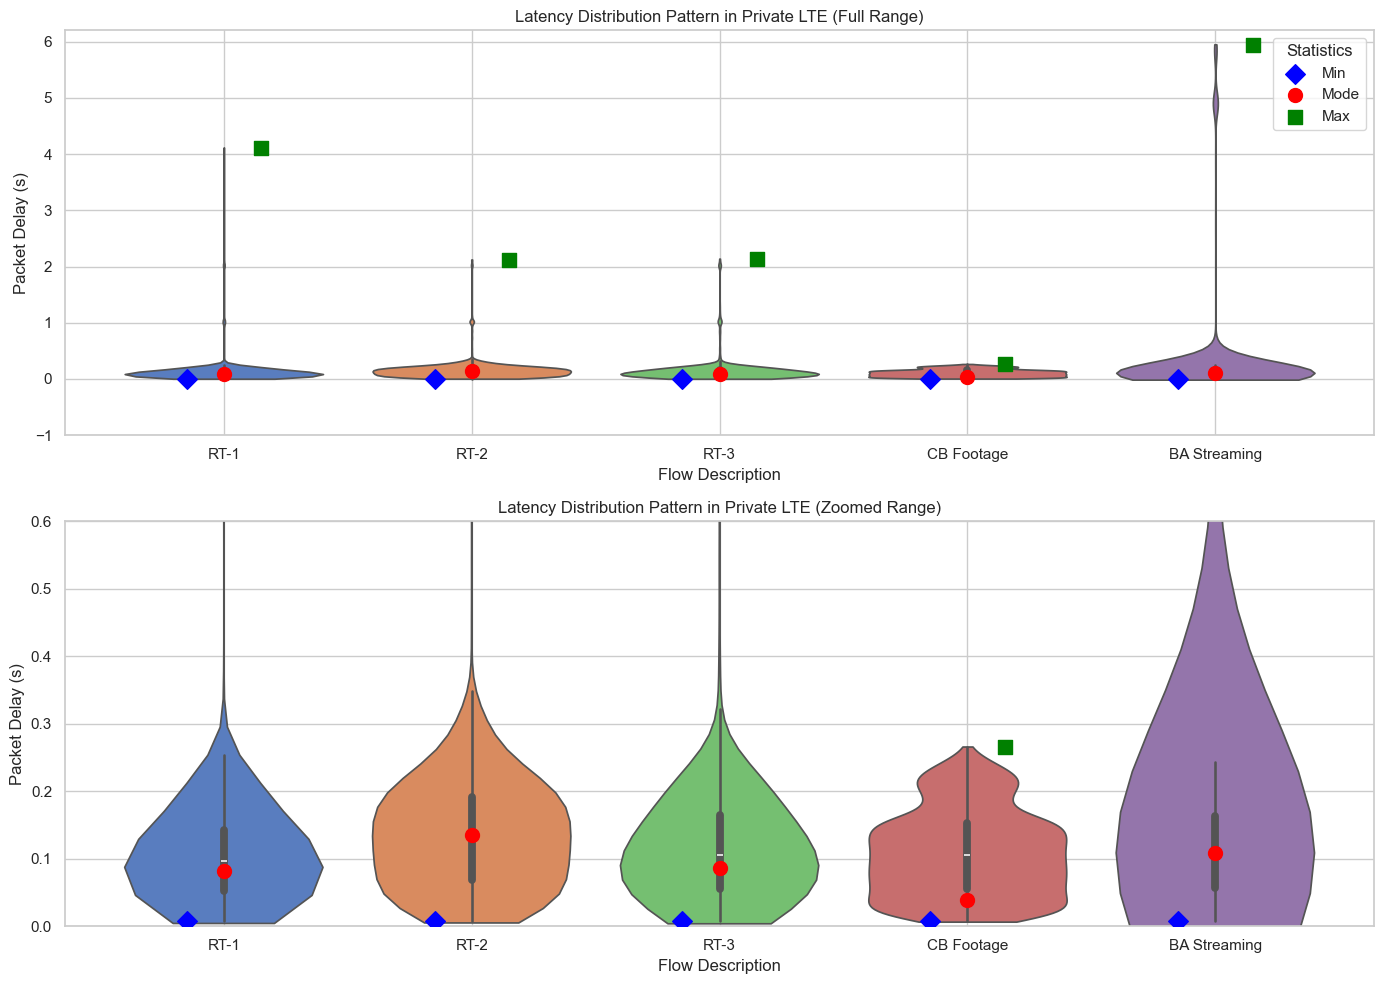

In [29]:
# Create the main plot
plt.figure(figsize=(14, 10))

# Create the main plot
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot
sns.set(style="whitegrid")
palette = sns.color_palette("muted", len(flow_descriptions))
swarm_plot = sns.violinplot(x='Flow Description', y='Start', hue='Flow Description', data=filtered_data, palette=palette, cut=0.1)

# Overlay min, max, and mode
for idx, row in stats_df.iterrows():
    flow_desc = row['Flow Description']
    min_delay = row['Min']
    max_delay = row['Max']
    mode_delay = row['Mode']
    
    plt.scatter([idx - 0.15], [min_delay], color='blue', marker='D', s=100, zorder=5, label='Min' if idx == 0 else "")
    if isinstance(mode_delay, tuple):
        plt.plot([idx, idx], [mode_delay[0], mode_delay[1]], color='red', linestyle='-', linewidth=2, zorder=5, label='Mode' if idx == 0 else "")
    else:
        plt.scatter([idx], [mode_delay], color='red', marker='o', s=100, zorder=5, label='Mode' if idx == 0 else "")
    plt.scatter([idx + 0.15], [max_delay], color='green', marker='s', s=100, zorder=5, label='Max' if idx == 0 else "")

# Customize main plot
plt.xlabel('Flow Description')
plt.ylabel('Packet Delay (s)')
swarm_plot.set(ylim=(-1, 6.2))  # Set the y-axis limit for the main plot
plt.title('Latency Distribution Pattern in Private LTE (Full Range)')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(title='Statistics', loc='upper right')

# Create the subfigure
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second subplot
sns.set(style="whitegrid")
palette = sns.color_palette("muted", len(flow_descriptions))
swarm_plot_sub = sns.violinplot(x='Flow Description', y='Start', hue='Flow Description', data=filtered_data, palette=palette, cut=0.1)

# Overlay min, max, and mode for subfigure
for idx, row in stats_df.iterrows():
    flow_desc = row['Flow Description']
    min_delay = row['Min']
    max_delay = row['Max']
    mode_delay = row['Mode']
    
    plt.scatter([idx - 0.15], [min_delay], color='blue', marker='D', s=100, zorder=5, label='Min' if idx == 0 else "")
    if isinstance(mode_delay, tuple):
        plt.plot([idx, idx], [mode_delay[0], mode_delay[1]], color='red', linestyle='-', linewidth=2, zorder=5, label='Mode' if idx == 0 else "")
    else:
        plt.scatter([idx], [mode_delay], color='red', marker='o', s=100, zorder=5, label='Mode' if idx == 0 else "")
    plt.scatter([idx + 0.15], [max_delay], color='green', marker='s', s=100, zorder=5, label='Max' if idx == 0 else "")

# Customize subfigure
plt.xlabel('Flow Description')
plt.ylabel('Packet Delay (s)')
plt.title('Latency Distribution Pattern in Private LTE (Zoomed Range)')
swarm_plot_sub.set(ylim=(0, 0.6))  # Set the y-axis limit for the subfigure
plt.xticks(rotation=0)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


The following cells are only warehouse

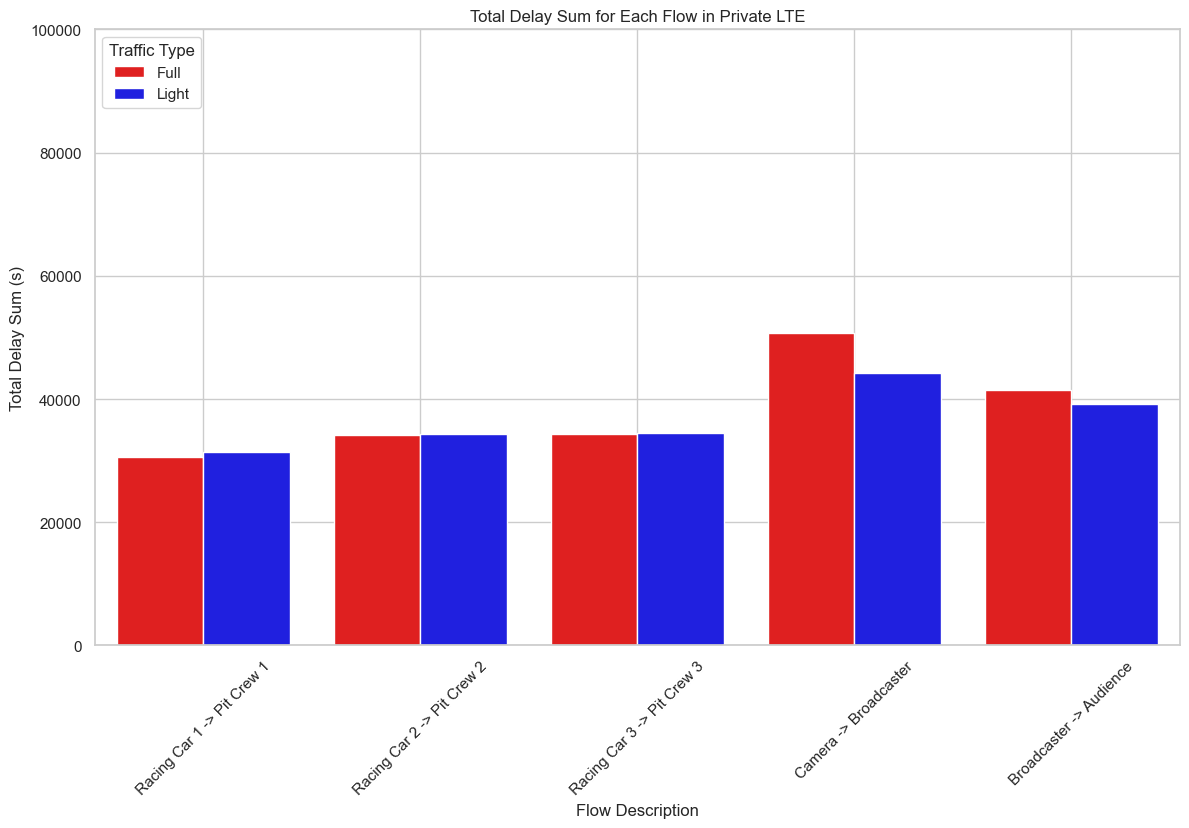

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the merged data
merged_df = pd.read_csv('private-delay-plot.csv')

# Define flow descriptions
flow_descriptions = {
    1: 'Racing Car 1 -> Pit Crew 1',
    2: 'Racing Car 2 -> Pit Crew 2',
    3: 'Racing Car 3 -> Pit Crew 3',
    7: 'Camera -> Broadcaster',
    8: 'Broadcaster -> Audience'
}

# Filter the data based on FlowID
filtered_data = merged_df[merged_df['FlowID'].isin([1, 2, 3, 7, 8])].copy()

# Calculate the delay sum for each FlowID
filtered_data['DelaySum'] = filtered_data['Start'] * filtered_data['Count']

# Aggregate the total delay sum for each FlowID and traffic type
delay_sums = filtered_data.groupby(['FlowID', 'traffic'])['DelaySum'].sum().reset_index()

# Map Flow IDs to descriptions
delay_sums['FlowDescription'] = delay_sums['FlowID'].map(flow_descriptions)

# Create the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(data=delay_sums, x='FlowDescription', y='DelaySum', hue='traffic', palette={'Full': 'red', 'Light': 'blue'})

# Customize plot
plt.xlabel('Flow Description')
plt.ylabel('Total Delay Sum (s)')
plt.title('Total Delay Sum for Each Flow in Private LTE')
plt.legend(title='Traffic Type', loc='upper left')
plt.xticks(rotation=45)
plt.ylim(0, 100000)  # Set the Y-axis limits
plt.grid(True)

# Show plot
plt.show()


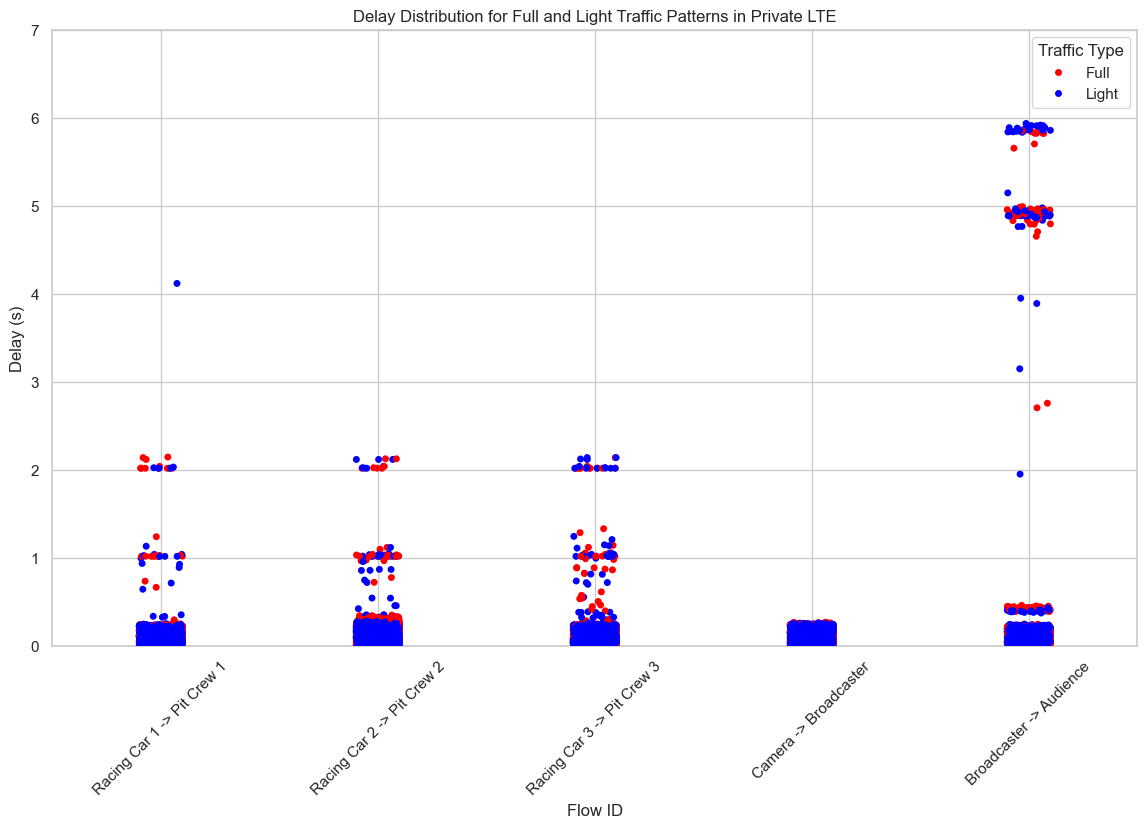

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the merged data
merged_df = pd.read_csv('private-delay-plot.csv')

# Define flow descriptions
flow_descriptions = {
    1: 'Racing Car 1 -> Pit Crew 1',
    2: 'Racing Car 2 -> Pit Crew 2',
    3: 'Racing Car 3 -> Pit Crew 3',
    7: 'Camera -> Broadcaster',
    8: 'Broadcaster -> Audience'
}

# Filter the data based on FlowID
filtered_data = merged_df[merged_df['FlowID'].isin([1, 2, 3, 7, 8])].copy()

# Map Flow IDs to descriptions
filtered_data['FlowDescription'] = filtered_data['FlowID'].map(flow_descriptions)

# Create the strip plot
plt.figure(figsize=(14, 8))
sns.stripplot(data=filtered_data, x='FlowDescription', y='Start', hue='traffic', palette={'Full': 'red', 'Light': 'blue'})

# Customize plot
plt.ylim(0, 7)
plt.xlabel('Flow ID')
plt.ylabel('Delay (s)')
plt.title('Delay Distribution for Full and Light Traffic Patterns in Private LTE')
plt.legend(title='Traffic Type')
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.show()


In [ ]:


# Load the merged data
merged_df = pd.read_csv('private-delay-plot.csv')

# Filter the data based on FlowID
filtered_data = merged_df[merged_df['FlowID'].isin([1, 2, 3, 7, 8])]

# Filter data for FlowIDs 1, 2, 3, 7, and 8
data = filtered_data[filtered_data['FlowID'].isin([1, 2, 3, 7, 8])]

# Function to calculate min, max, and median
def calculate_min_max_median(df, group_col, calc_col):
    group = df.groupby(group_col)[calc_col]
    min_values = group.min()
    max_values = group.max()
    median_values = group.median()
    return min_values, max_values, median_values

# Calculate min, max, and median for 'Start' grouped by 'FlowID' and 'Traffic'
min_values_full, max_values_full, median_values_full = calculate_min_max_median(data[data['traffic'] == 'Full'], 'FlowID', 'Start')
min_values_light, max_values_light, median_values_light = calculate_min_max_median(data[data['traffic'] == 'Light'], 'FlowID', 'Start')

plt=sns.catplot(data=data[data['traffic'] == 'Full'], x='FlowID', y='Start', kind='strip', height=5, aspect=2)
plt.set(ylim=(0, 0.1))



In [ ]:

plt=sns.catplot(data=data[data['traffic'] == 'Light'], x='FlowID', y='Start', kind='strip', height=5, aspect=2)

plt.set(ylim=(0, 0.5))


In [ ]:
data = merged_df.copy()
data['FlowID'] 
data = data[data.FlowID.isin([1,2,3,7,8])]
data['Throughput'] = data['Throughput']/1000
plt = sns.catplot(data, x='FlowID', y='Throughput',kind='box',errorbar=('ci',100),)
plt.set(ylim=(0, 400))